# Lending club data analysis

## Analysis of Lending club customer data to unbderstand the chances of customer defaulting

## Following columns have been considered during this analysis
1) DTI - Debt to income ratio calculated using the borrower’s total monthly debt divided by the borrower’s self-reported monthly income <br>
2) loan_amnt - Amount requested by borrower<br>
3) funded_amnt_inv - Amount lent by investors <br>
4) annual_inc - annual income provided by the borrower<br>
5) grade - Grade of the loan (A- Better grade, G- Low grade)<br>
6) loan_status - Current status of the loan<br>
7) verification_status - Indicates if income was verified by Lending club<br>
8) purpose - Purpose of the loan like Education, Buying house etc.<br>
9) home_ownership - Member owns a house or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
loan = pd.read_csv('/Users/personal/Downloads/loan.csv')

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_46333/375698298.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('/Users/personal/Downloads/loan.csv')


In [3]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Noticed that a lot number of columns have all NAN values. We can get rid of them.

In [4]:
loan = loan.dropna(axis=1, how='all')

In [5]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
loan.shape

(39717, 57)

## Lets remove duplicate records if any

In [8]:
loan = loan.drop_duplicates()

In [9]:
loan.shape

(39717, 57)

## Lets check if there is any member who has duplicate records. 

In [10]:
loan.member_id.nunique()

39717

## Lets check the number of null values in each column 

We can notice that columns like mths_since_last_delinq, mths_since_last_record and next_pymnt_d are null for almost 90% of members. Even though i'm not using these field in my analysis, here is how, we can deal with this situation <br>
1) mths_since_last_delinq - This could be null because customer has not been delinquent at all. So we can replace null with 0<br>
2) mths_since_last_record -  Same as above. We can replace them with 0<br>
3) next_pymnt_d - This column should have a date value. These fields can be null for Fully paid and Charged off loans<br>

In [12]:
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

## Lets check if there is any row with all null values. If the sum is equal to number of columns(57), it means the row is all NAN

In [13]:
loan[loan.isnull().sum(axis=1)==57]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


## Lets check the values in the columns which are using in this analysis. 

<b>1) loan_amnt - It has outliers as shown in the box plot but we need not get rid of them for this analysis as we need that customer's record to check the chances of defaulting. <br>Also loan amount column has no null values.</p>

<AxesSubplot:>

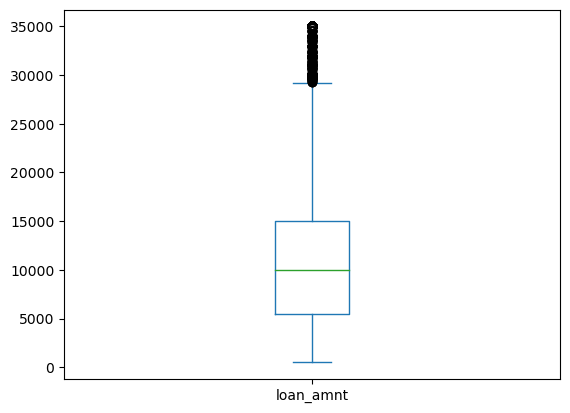

In [15]:
loan.loan_amnt.plot.box()

In [22]:
loan[loan.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


<b>2) DTI histogram shows that most members have ratio of 10-20 which is good. <br>No null values in this field.<b>

In [17]:
loan.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

(array([5140., 8062., 9893., 9108., 6836.,  678.]),
 array([ 0.        ,  4.99833333,  9.99666667, 14.995     , 19.99333333,
        24.99166667, 29.99      ]),
 <BarContainer object of 6 artists>)

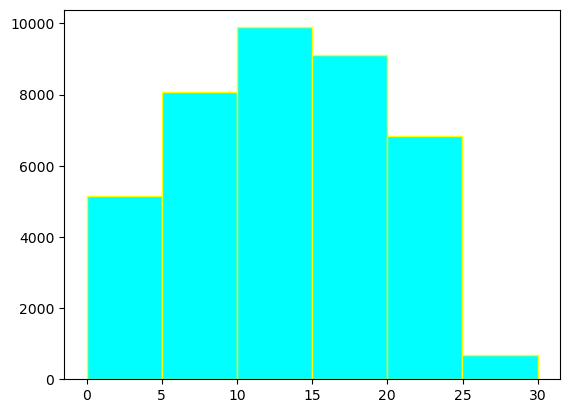

In [18]:
plt.hist(loan.dti, bins = 6, edgecolor='yellow', color='cyan')

<b>3) funded_amnt_inv - Most of the loans disbursed are inbetween 5 - 10K <br> No null values detected.

In [24]:
loan.funded_amnt_inv.describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

(array([5447., 9846., 8761., 5161., 4236., 2729., 1395., 1075.,  463.,
         604.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <BarContainer object of 10 artists>)

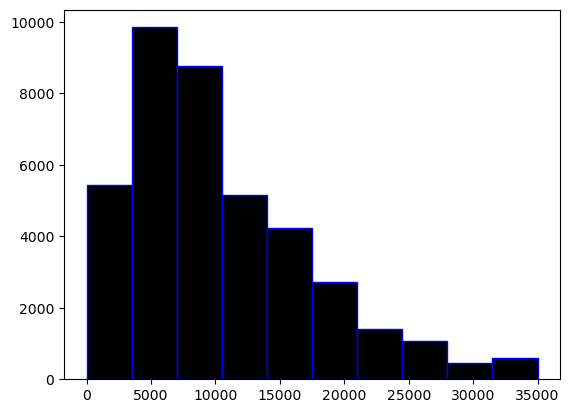

In [30]:
plt.hist(loan.funded_amnt_inv, bins = 10, edgecolor='blue', color='black')

<b>4) grade - A, B and C grade loans are more compared to D, E, F, G loans. <b>

In [31]:
loan.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

<b> 5) loan_status - Fully paid members are more compared to Charged off which is a good sign for Lending club. <br>This field is going to help a lot in analysing a customer.

In [32]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<b>6) verification_status - Half of the customer's income is not verified which is not good sign. These cutomers can be further analysed with the previous loan status.

In [33]:
loan.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

<b>7) purpose - Half of the loans are for debt consolidation which means customer has come old debts which have been consolidated into one payment which may be charging higher interest rates. 

In [34]:
loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

<b>8) home_ownership - Comparing the values in this column to Loan status should give interesting results

In [35]:
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [36]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Lets try to find out how many customers actually got the requested loan amount

<b>We need to create another column which will the difference between loan_amnt and funded_amnt_inv

In [57]:
loan["funded_amnt_inv"] = loan["funded_amnt_inv"].astype(int)

In [60]:
loan["loan_diff"] = loan["loan_amnt"] - loan["funded_amnt_inv"]

### These customers have been issued full loan last time which are graded as A,B and C and they have paid off the loan without defaulting. So these customers can be considered to be offered loan again. 

In [72]:
loan[loan["grade"].isin(["A","B","C"]) & loan["loan_diff"] == 0 & loan["loan_status"].isin(["Fully Paid"])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_diff
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,92676,92671,5000,5000,150,36 months,8.07%,156.84,A,A4,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,4850
39710,92507,92502,5000,5000,250,36 months,7.43%,155.38,A,A2,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,4750
39711,92402,92390,5000,5000,700,36 months,8.70%,158.30,B,B1,...,Nov-14,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,4300
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,4350


### As the chart below suggests that charged off loans are more when the difference between the loan requested and loan received is more. So its better to customers who have been offered complete loan requested.

In [73]:
import seaborn as sns

<AxesSubplot:xlabel='loan_diff', ylabel='loan_status'>

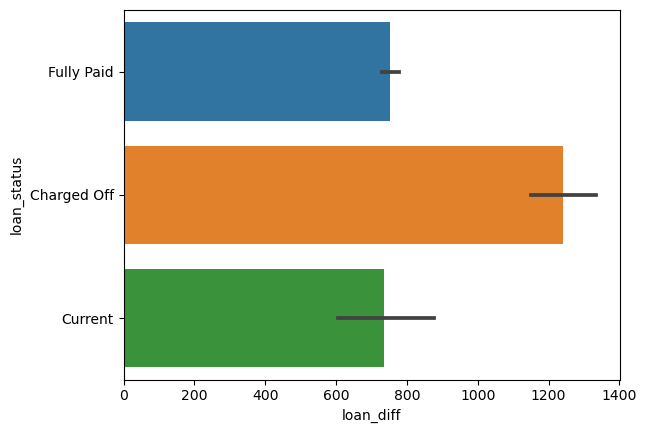

In [74]:
sns.barplot(data=loan, x='loan_diff', y='loan_status', estimator=np.mean)

## Lets try to find out the corelation between the DTI and Loan status
<b>Looks like DTI does not have much effect on charged off loans

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

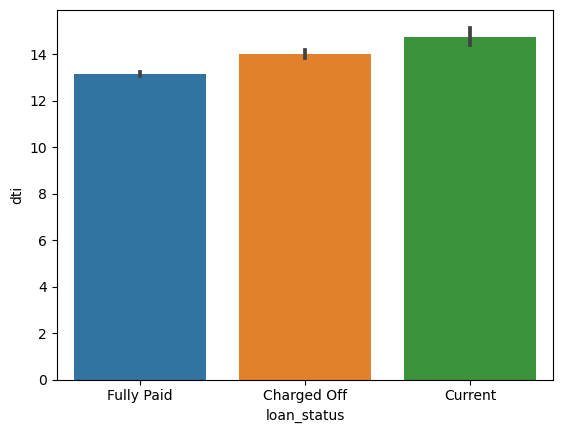

In [84]:
sns.barplot(data=loan, x='loan_status', y='dti', estimator=np.mean)

## Lets try to find out if grade of the loan has any effect on loan status
<b>Charged off loans are proportional to Fully paid in all grades. Not much to offer here.

<AxesSubplot:xlabel='grade'>

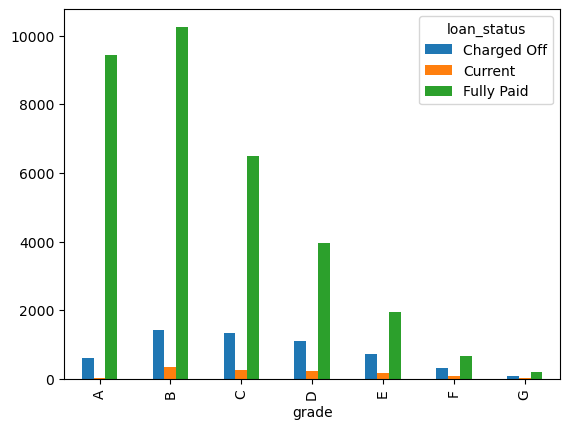

In [87]:
pd.crosstab(index=loan['grade'],columns=loan['loan_status']).plot.bar()

## Lets try to find out if verfication status have any effect on loan status
<b> Dont seem to have any effect on defaulting

<AxesSubplot:xlabel='verification_status'>

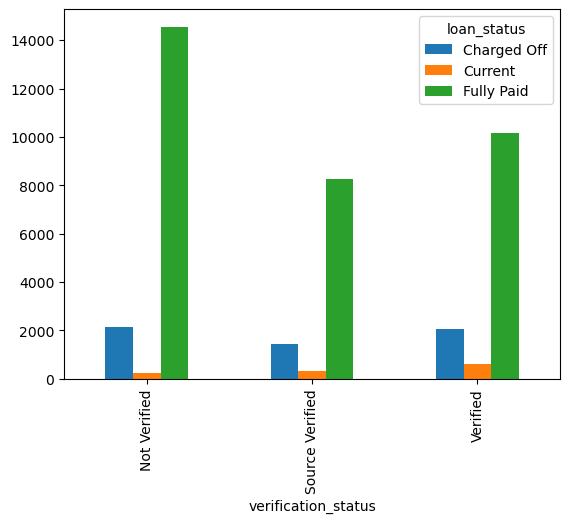

In [88]:
pd.crosstab(index=loan['verification_status'],columns=loan['loan_status']).plot.bar()

## Lets try to find out if Home ownership has any effect on loan status

<b> As we can see house owners have defaulted less compared to members with Rented and Mortgage place

<AxesSubplot:xlabel='home_ownership'>

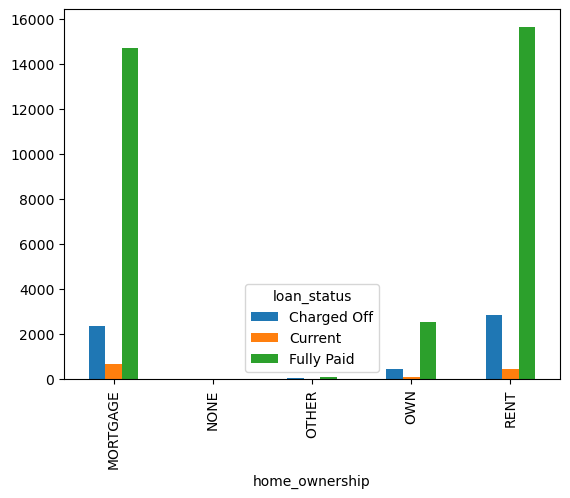

In [90]:
pd.crosstab(index=loan['home_ownership'],columns=loan['loan_status']).plot.bar()

## Average loan amount is high House, Debt consolidation,Small business and  Credit card

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

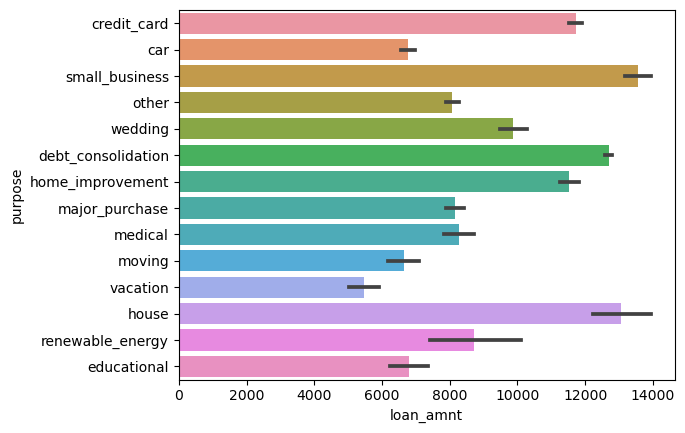

In [91]:
sns.barplot(data=loan, x='loan_amnt', y='purpose', estimator=np.mean)